# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [83]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [58]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [59]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


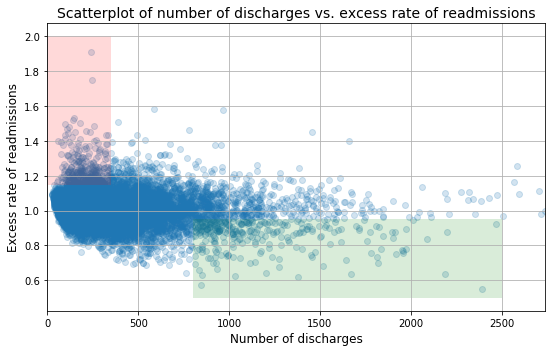

In [31]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [60]:
clean_hospital_read_df.columns = [x.strip().replace(' ', '') for x in clean_hospital_read_df.columns]

In [61]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
HospitalName                11578 non-null object
ProviderNumber              11578 non-null int64
State                       11578 non-null object
MeasureName                 11578 non-null object
NumberofDischarges          11578 non-null int64
Footnote                    81 non-null float64
ExcessReadmissionRatio      11497 non-null float64
PredictedReadmissionRate    11497 non-null float64
ExpectedReadmissionRate     11497 non-null float64
NumberofReadmissions        11497 non-null float64
StartDate                   11578 non-null object
EndDate                     11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


<H3> From below details we can infer that number of discharges does impact the readmission rate inversely.</H3>

In [ ]:
clean_hospital_read_df = clean_hospital_read_df.drop(clean_hospital_read_df[clean_hospital_read_df.ExcessReadmissionRatio.isnull()].index, axis=0)

- Null hypothesis. There is no relationship between number of discharges and excess readmission ratio
- Alternate hypothesis. There is a relationship between the number of discharges and excess readmission ratio

Results:

- The p value is &gt;0.01. Thus null hypothesis can not be rejected. This means that there is no relationship suggesting between the readmission rate and size of the hospitals.

- Statistical significance refers to the unlikelihood that the result is obtained by chance. While the practical significance implies existence of relationship between variables and real world scenario. In our scenario, yes practical and statistical significance differ here. As the preliminary analysis suggests that there is a relationship between excess readmission rate and number of discharges, this relationship is not significant. In other words, these results could have been obtained purely by chance.

In [75]:
from scipy.stats import linregress

linregress(clean_hospital_read_df['NumberofDischarges'], clean_hospital_read_df['ExcessReadmissionRatio'])

LinregressResult(slope=-2.9010517330570701e-05, intercept=1.018106147373357, rvalue=-0.097397943510793519, pvalue=1.2225473776734486e-25, stderr=2.7649127349110591e-06)

In [69]:
from statsmodels.formula.api import ols

m = ols('ExcessReadmissionRatio ~ NumberofDischarges',clean_hospital_read_df).fit()

print(m.summary())

                              OLS Regression Results                              
Dep. Variable:     ExcessReadmissionRatio   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.009
Method:                     Least Squares   F-statistic:                     110.1
Date:                    Wed, 30 May 2018   Prob (F-statistic):           1.22e-25
Time:                            00:05:49   Log-Likelihood:                 11178.
No. Observations:                   11497   AIC:                        -2.235e+04
Df Residuals:                       11495   BIC:                        -2.234e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [80]:
df = clean_hospital_read_df.iloc[:,[2,4,6,7,8,9]]

In [90]:
df['Excess_Flag'] = df['ExcessReadmissionRatio']>1.0

/Users/preethi.john/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
df = df.groupby(['State', 'Excess_Flag']).ExcessReadmissionRatio.count().reset_index()

<H3>There is a significant difference in trend between the states as seen below. For example, the excess readmission ratio is significantly higher in CA than in Texas. The comparisson of two plots also shows that states with larger number of big hospitals do not end up with lesser readmission ratio.</H3>

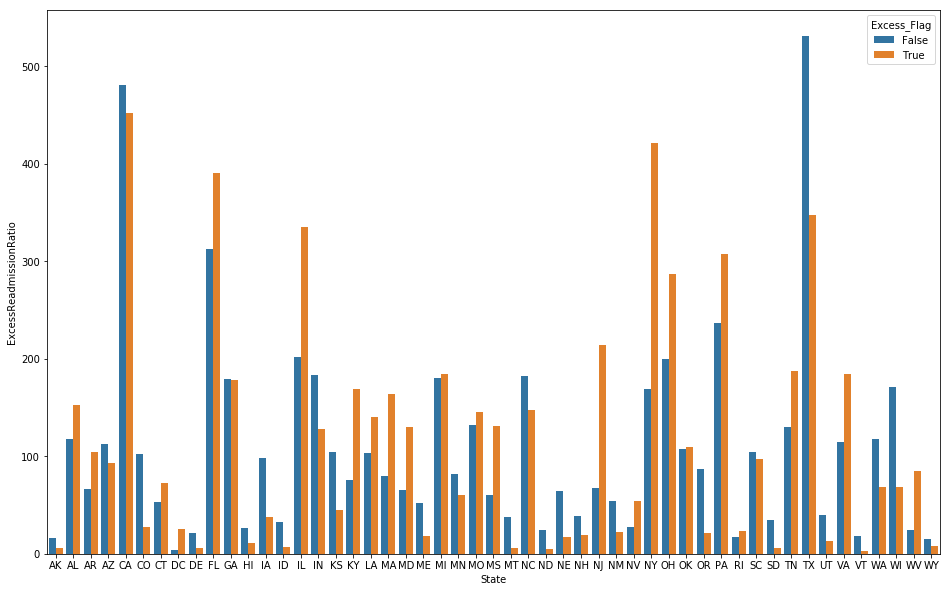

In [99]:
fig = plt.gcf()
sns.barplot(x='State', y='ExcessReadmissionRatio', hue='Excess_Flag', data=df)
fig.set_size_inches(16, 10)
plt.show()

In [114]:
clean_hospital_read_df['BigHospital']=clean_hospital_read_df['NumberofDischarges']>300

df = clean_hospital_read_df.groupby(['State', 'BigHospital']).ExcessReadmissionRatio.count().reset_index()

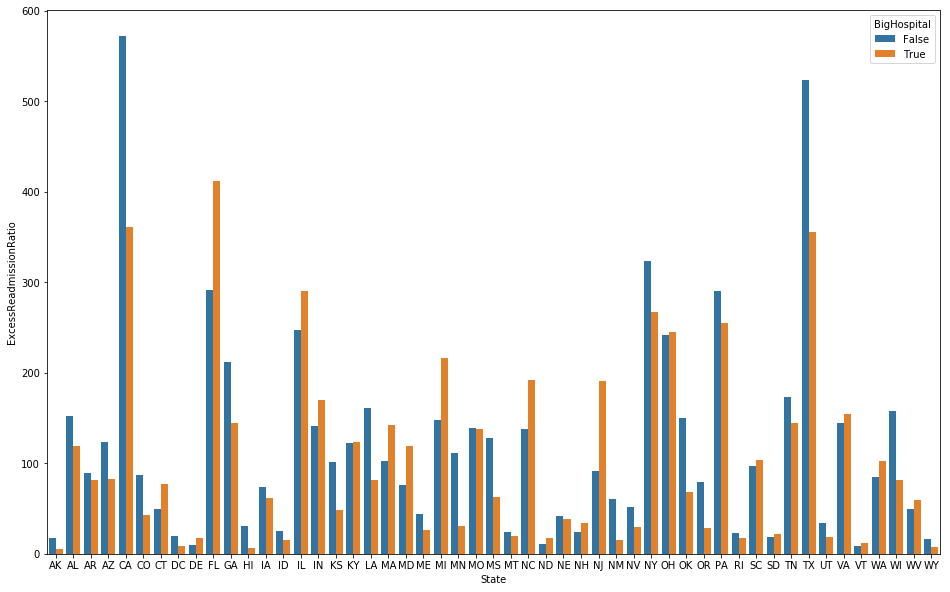

In [115]:
fig = plt.gcf()
sns.barplot(x='State', y='ExcessReadmissionRatio', hue='BigHospital', data=df)
fig.set_size_inches(16, 10)
plt.show()

<H3>Conclusion:</H3>

There is a no relationship between number of discharges and excess readmission ratio.

The trend is actually very different for various states. States like Texas and Wiscosin fare better than New york, new jersey and california.

The comparisson of the 2nd and 3rd plots clearly state that the bigger hospitals do not give lesser excess readmission ratio.

As the performance of the hospitals varies greatly by states, its the best practices and not the size of the hospitals that determine the readmission rate. Though, the size of the hospitals can bring down the readmission rates to a certain extent logically, the numbers do not say the same.

The best practices of these states like Texas should be incorporated into poorly performing states to improve the performance of the hospitals. 